# Grafico

In [1]:
import numpy as np
from numpy import random

import matplotlib.pyplot as plt
import matplotlib.cm as cm

import pandas as pd

- Leggo i valori calcolati in precedenza dellla norma $L^2$ 
- Faccio un grafico in scala bi-logaritmica
- Stampo su schermo il dataframe contenente i dati graficati: le righe indicano il numero di d.o.f. mentre le colonne il numero di punti usati per la quadratura

In [2]:
#reading
LN = pd.read_csv("files/BEM/circle-convergence/lebesgue_norm.csv")
LN.set_index("index",drop=True,inplace=True)

LNv = pd.read_csv("files/BEM/circle-convergence/lebesgue_norm_var.csv")
LNv.set_index("index",drop=True,inplace=True)

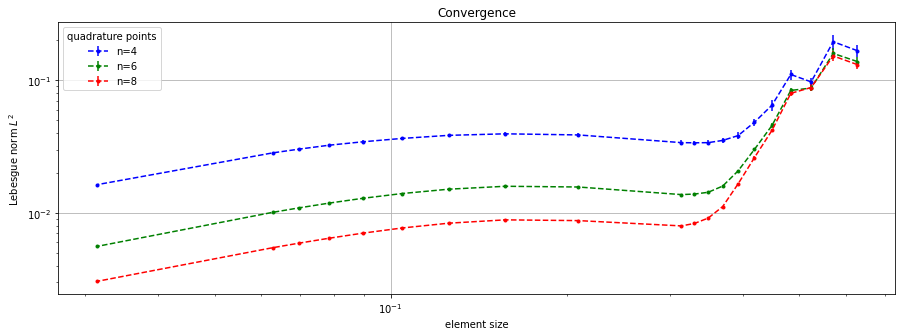

In [30]:
#grafico
fig = plt.figure(figsize=(15,5))

#
ax = fig.add_subplot(111)
ax.errorbar(2*np.pi/LN.index,LN["4"],yerr=LNv["4"],color="blue",label="n=4",linestyle="--",marker=".")
ax.errorbar(2*np.pi/LN.index,LN["6"],yerr=LNv["6"],color="green",label="n=6",linestyle="--",marker=".")
ax.errorbar(2*np.pi/LN.index,LN["8"],yerr=LNv["8"],color="red",label="n=8",linestyle="--",marker=".")
#ax.scatter(N_arr_2,Lebesgue_norm,color="red",label="calculations")
#plt.xlim(8,41)
plt.grid(True)
plt.xlabel("element size")
plt.ylabel("Lebesgue norm $L^2$")
plt.legend(title="quadrature points")
plt.title("Convergence")
plt.xscale("log")
plt.yscale("log")

plt.show()

In [4]:
LN

,4,6,8
index,,,
10,0.166334,0.137798,0.130715
11,0.194694,0.158754,0.151998
12,0.096935,0.087117,0.087906
13,0.110176,0.083566,0.079467
14,0.064707,0.045498,0.041841
15,0.048154,0.030076,0.026083
16,0.038177,0.020698,0.016512
17,0.035116,0.015907,0.011145
18,0.033795,0.014287,0.009131


# Ordine di convergenza

- Calcolo l'ordine di convergenza fittando i dati con una retta dopo aver calcolato il logaritmo naturale dei valori sulla x e dei valori sulla y
- Calcolo l'ordine di convergenza considerado via via sempre meno dati: parto considerando da 20 d.o.f in su, 40,60,80 ed infine 100 in su (cioè nell'ultimo caso soltanto gli ultimi due punti con 100 e 200 d.o.f.)
- Riporto i valori dei coefficienti angolari calcolati in un dataframe
- Faccio un grafico degli ordini di convergenza calcolati al variare dei d.o.f considerati: ogni colore corrisponde ad un diverso numero di punti di quadratura utilizzati

In [31]:
#impostazioni output si schermo
np.set_printoptions(precision=4,linewidth=100)
#
result = pd.DataFrame(columns=LN.columns,index=[20,40,60,80,100])
#
index_arr = np.asarray(LN.index)
x = np.log(2*np.pi/index_arr)
#print("index_arr :",index_arr)
#print("        x :",x)
#
for i in result.index:
    print("\ncycle i:",i)    
    index = index_arr >= i
    print("index:",index_arr[index])    
    for n in LN.columns :
        y = np.asarray(np.log(LN[n]))
        print("------------------------------------------------")
        print("n:",n)
        print("x:",x[index])
        print("y:",y[index])
        fit = np.polyfit(x=x[index],y=y[index],deg=1)
        result.at[i,n] = fit[0]
        #result.at[n,"q"] = fit[1]
        print("m:",fit[0])
        #print("q:",fit[1])
    print("------------------------------------------------------------------------------------------------")


cycle i: 20
index: [ 20  30  40  50  60  70  80  90 100 200]
------------------------------------------------
n: 4
x: [-1.1579 -1.5633 -1.851  -2.0741 -2.2565 -2.4106 -2.5441 -2.6619 -2.7673 -3.4604]
y: [-3.3872 -3.2538 -3.2344 -3.261  -3.3139 -3.372  -3.4317 -3.4991 -3.5653 -4.1178]
m: 0.30895722640562057
------------------------------------------------
n: 6
x: [-1.1579 -1.5633 -1.851  -2.0741 -2.2565 -2.4106 -2.5441 -2.6619 -2.7673 -3.4604]
y: [-4.2884 -4.1566 -4.144  -4.1948 -4.2695 -4.3519 -4.4356 -4.5176 -4.5964 -5.1883]
m: 0.39602119982842726
------------------------------------------------
n: 8
x: [-1.1579 -1.5633 -1.851  -2.0741 -2.2565 -2.4106 -2.5441 -2.6619 -2.7673 -3.4604]
y: [-4.8312 -4.7395 -4.7264 -4.7843 -4.8668 -4.9561 -5.0446 -5.1295 -5.2096 -5.7943]
m: 0.423682807196612
------------------------------------------------------------------------------------------------

cycle i: 40
index: [ 40  50  60  70  80  90 100 200]
------------------------------------------------

In [32]:
result

,4,6,8
20,0.308957,0.396021,0.423683
40,0.555181,0.660954,0.677369
60,0.686786,0.777906,0.782741
80,0.762859,0.831248,0.825837
100,0.797069,0.853939,0.843658


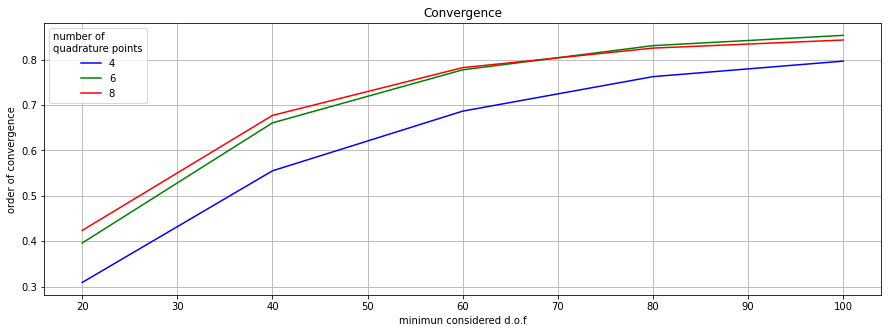

In [36]:
#grafico
fig = plt.figure(figsize=(15,5))

#
ax = fig.add_subplot(111)
ax.plot(result.index,result["4"],color="blue",label="4")
ax.plot(result.index,result["6"],color="green",label="6")
ax.plot(result.index,result["8"],color="red",label="8")
plt.grid(True)

plt.xlabel("minimun considered d.o.f")
plt.ylabel("order of convergence")
plt.legend(title="number of \nquadrature points")
plt.title("Convergence")

plt.show()

- Al crescere dei gradi di libertà cresce anche l'ordine di convergenza, ma si intuisce già una valore asintotico prossimo ad 1
- Al crescere dei punti di quadratura utilizzati generalmente cresce (di vari centesimi) l'ordine di convergenza